In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/root_cause_analysis.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1000 non-null   int64 
 1   CPU_LOAD     1000 non-null   int64 
 2   MEMORY_LOAD  1000 non-null   int64 
 3   DELAY        1000 non-null   int64 
 4   ERROR_1000   1000 non-null   int64 
 5   ERROR_1001   1000 non-null   int64 
 6   ERROR_1002   1000 non-null   int64 
 7   ERROR_1003   1000 non-null   int64 
 8   ROOT_CAUSE   1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [ ]:
df.head()

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY
1,2,0,0,0,0,0,0,1,MEMORY
2,3,0,1,1,0,0,1,1,MEMORY
3,4,0,1,0,1,1,0,1,MEMORY
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [ ]:
df['ROOT_CAUSE'].unique()

array(['MEMORY', 'NETWORK_DELAY', 'DATABASE_ISSUE'], dtype=object)

In [ ]:
del df['ID']

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ROOT_CAUSE'] = label_encoder.fit_transform(
                                df['ROOT_CAUSE'])

In [ ]:
#Convert input to numpy array
np_df = df.to_numpy()

In [ ]:
#Separate feature and target variables
X_data = np_df[:,0:7]
Y_data=np_df[:,7]

In [ ]:
#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [ ]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

In [ ]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(200,                    #Number of nodes
                             input_shape=(7,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(100,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 200)               1600      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 100)               20100     
                                                                 
 Output-Layer (Dense)        (None, 3)                 303       
                                                                 
Total params: 22,003
Trainable params: 22,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
VERBOSE=1
BATCH_SIZE=16
EPOCHS=10
VALIDATION_SPLIT=0.2

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 0.7131 - accuracy: 0.7750 - val_loss: 0.5862 - val_accuracy: 0.7611
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8375 - val_loss: 0.5588 - val_accuracy: 0.7778
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8403 - val_loss: 0.5626 - val_accuracy: 0.7944
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8556 - val_loss: 0.5663 - val_accuracy: 0.7889
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8514 - val_loss: 0.5541 - val_accuracy: 0.7944
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8611 - val_loss: 0.5506 - val_accuracy: 0.8056
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8556 - val_loss: 0.5417 - val_accuracy: 0.8000
Epoch 8/10
45/45 [==


Accuracy during Training :
------------------------------------


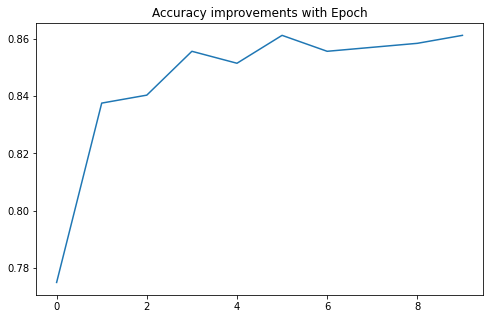

In [ ]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [ ]:
#Raw prediction data
prediction_input = [[0, 1 , 0, 1, 0, 1, 1 ]]

#Get raw prediction probabilities
raw_prediction = model.predict(prediction_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 90ms/step
Raw Prediction Output (Probabilities) : [[0.01243004 0.9450535  0.04251639]]
Prediction is  ['MEMORY']
